In [2]:
from IPython.display import Image
from nansat.nansat import Nansat
from nansat.nansat import Domain
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Nansat reading data from the met.no OPeNDAP server
n1 = Nansat('http://nbstds.met.no/thredds/dodsC/NBS/S2A/2019/08/27/S2A_MSIL1C_20190827T105621_N0208_R094_T32VNR_20190827T130152.nc')

/home/ninsbl/.local/share/Trash/files/nansat-1.2.2/nansat/mappers/opendap.py:112: UserWarning: Time consuming loading time from OpenDAP...
  warnings.warn('Time consuming loading time from OpenDAP...')
/home/ninsbl/.local/share/Trash/files/nansat-1.2.2/nansat/mappers/opendap.py:114: UserWarning: Loading time - OK!
  warnings.warn('Loading time - OK!')


In [4]:
# Subeset the image for the area south of Trondheim
D = Domain(4326, '-lle 10.35 63.35 10.40 63.40, -tr 0.0001 0.0001')

In [5]:
n1.reproject(D)

In [6]:
# Show the meta data form the image
n1.get_metadata()

{'CLOUD_COVERAGE_ASSESSMENT': '0.1765',
 'Conventions': 'CF-1.6',
 'DATATAKE_1_DATATAKE_SENSING_START': '2019-08-27T10:56:21.024Z',
 'DATATAKE_1_DATATAKE_TYPE': 'INS-NOBS',
 'DATATAKE_1_ID': 'GS2A_20190827T105621_021827_N02.08',
 'DATATAKE_1_SENSING_ORBIT_DIRECTION': 'ASCENDING',
 'DATATAKE_1_SPACECRAFT_NAME': 'Sentinel-2A',
 'DEGRADED_ANC_DATA_PERCENTAGE': '0.0',
 'DEGRADED_MSI_DATA_PERCENTAGE': '0',
 'DODS.dimName': 'dimension_SAFE_structure',
 'DODS.strlen': '7732',
 'FOOTPRINT': 'POLYGON((8.999590706563469 64.02715388084466, 11.245571461402704 64.0097975893708, 11.16948289649414 63.025114602815776, 8.999604588490575 63.04174199627472, 8.999590706563469 64.02715388084466))',
 'GENERATION_TIME': '2019-08-27T13:01:52.000000Z',
 'ISO_topic_category': 'Imagery/Base Maps/Earth Cover',
 'PREVIEW_GEO_INFO': 'Not applicable',
 'PREVIEW_IMAGE_URL': 'Not applicable',
 'PROCESSING_BASELINE': '02.08',
 'PROCESSING_LEVEL': 'Level-1C',
 'PRODUCT_START_TIME': '2019-08-27T10:56:21.024Z',
 'PRODUCT_

In [7]:
# Calculate Normalized difference vegetation index
NDVI = (n1['B8'] - n1['B4'])/(n1['B8'] + n1['B4'])

In [8]:
# Show the NDVI array
stats.describe(NDVI[0])

DescribeResult(nobs=500, minmax=(-0.037037037, 0.76552325), mean=0.45889696, variance=0.044195347, skewness=-0.6166130304336548, kurtosis=-0.6404886255732323)

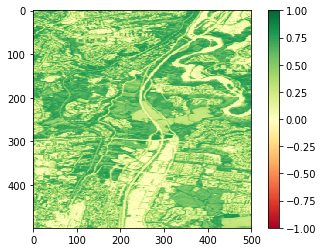

In [9]:
plt.imshow(NDVI, cmap="RdYlGn", vmin=-1, vmax=1, interpolation='nearest', aspect='equal');plt.colorbar()

In [10]:
'''Add the NDVI band to the image'''
n1.add_band(array=NDVI, parameters={'name': 'NDVI', 'coordinate':'lat lon', 'grid_mapping': 'UTM_projection', 'long_name': 'normalized difference vegetation index', 'minmax' : '-1 1'})

In [11]:
# Exaport the NDVI band plus any other band to create netcdf file
n1.export('/mnt/falk-ns9693k/data/NERSC/ndvi_20190827T105621.nc', ['NDVI','B4', 'B8'])